# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

## Submitted By: Ninad Ghike

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/udacity/share/traffic_sign_data/train.p'
testing_file = '/home/udacity/share/traffic_sign_data/test.p'
validation_file = '/home/udacity/share/traffic_sign_data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

print('Done loading data')

Done loading data


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: Number of validation examples.
n_valid = len(X_validation)


# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

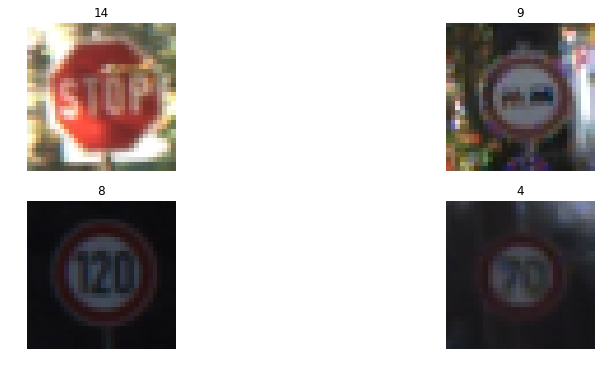

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,2, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(4):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

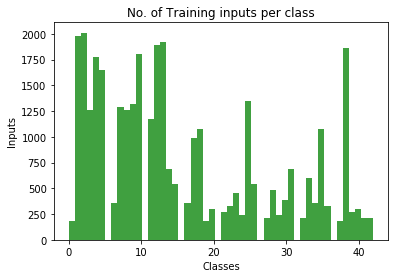

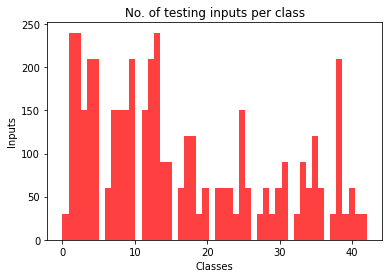

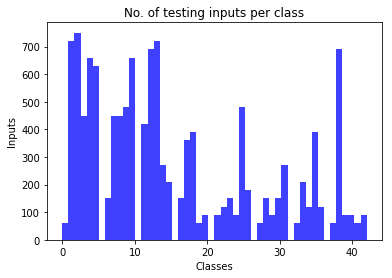

In [4]:
import scipy.ndimage

#set up the plot and show the training data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_train, 50, facecolor = 'green', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of Training inputs per class')
plt.show()

#set up the plot and show the testing data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_validation, 50, facecolor = 'red', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of testing inputs per class')
plt.show()

#set up the plot and show the testing data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_test, 50, facecolor = 'blue', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of testing inputs per class')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Preprocessing
Done preprocessing


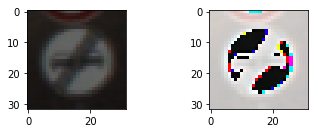

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
print('Preprocessing')
from sklearn.utils import shuffle
import cv2


# retain the original data(just in case)
X_train_orig = X_train
X_test_orig = X_test
X_valid_orig = X_validation


# Normalise input (images still in colour)
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))
X_validation = (X_validation - X_validation.mean()) / (np.max(X_validation) - np.min(X_validation))


def plot_norm_image(image_index):
    """Plots original image on the left and normalised image on the right."""
    plt.subplot(2,2,1)
    plt.imshow(X_train_orig[image_index])
    plt.subplot(2,2,2)
    plt.imshow(X_train[image_index])
    
    
plot_norm_image(20)

def preprocess(image):
    img = np.copy(image)
    img[:,:,0] = cv2.equalizeHist(img[:,:,0])
    img[:,:,1] = cv2.equalizeHist(img[:,:,1])
    img[:,:,2] = cv2.equalizeHist(img[:,:,2])
    img = img/255.-.5
                
print('Done preprocessing')

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Initially I tried making the image less noisy. However, in some cases it worked really well, but in some cases the image was beyond identifiable. So I decided against the denoising. I applied a histogram equalization to make the image uniformly bright thereby avoiding too many hotspots or darkspots. This may also help the algorithm because there the image is evenly bright. I also scaled images between -.5 and .5, by dividing by 255. and subtracting .5. All these were done on shuffled dataset.**

In [6]:
### SETTING UP TENSOR FLOW
import tensorflow as tf



In [7]:
### Generate data additional data (OPTIONAL!)
print('Generating transformed data...')
### Rotate image, translate image, shear image

def transformation(image,ang_range,shear_range,trans_range):
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    #image = preprocess(image)
    #add_mode_data(image, label)
    return image

for i in range(n_classes):
        for j in range(len(y_train)):
            if (i == y_train[j]):
                #X_train[j] = transformation(X_train[j], 30, 5, 5)
                break

print('Done generating transformed data')

Generating transformed data...
Done generating transformed data


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**The training and testing data have been split up such that 10% of the training data is validation data since the one thing we are trying to avoid is overfitting. I did not add data, I just tried jittering the images. For jittering, I rotated the images by random number generated between +/- 30 degress, shifted them by +/- 5 pixels along vertical and horizontal, and a final shearing transformation. All these are done randomly. The reason for jittering is to make the convNets yield more robust learning to potential deformations in the test set.**

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x108.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 108), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(108))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 108, 200), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(200))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5000, 1000), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1000))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1000, 200), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(200))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    print(logits.get_shape().as_list())
    
    return logits

In [9]:
###Setting up features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Architecture:**

**Filter dimensions: 5X5.**

**Layer 1: Convolutional. The output shape is 28x28x6. With a RELU activation and Pooling with output shape of 14x14x6.**

**Layer 2: Convolutional. The output shape is 10x10x16. With a RELU activation and Pooling with output shape of 5x5x16.**

**Flattening: The output shape of the final pooling layer was flattened such that it is 1D instead of 3D. The output of this layer is 5*5*16 = 400.**

**Layer 3: Fully Connected. This layer has 120 outputs with a RELU activation.**

**Layer 4: Fully Connected. This layer has 84 outputs with a RELU activation.**

**Layer 5: Fully Connected (Logits). This is the final layer and has 43 outputs.**

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

### TRAINING PIPELINE
rate = 0.001
EPOCHS = 20
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



[None, 43]


In [11]:
###MODEL EVALUATION
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
### TRAIN THE MODEL
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...



KeyboardInterrupt: 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**I used the following to train my model:**

**Epochs: 20, batch size: 128**

**Hyperparameters: learning rate of 1e-3, mean of 0 and standard deviation of .1.**

**Weights used in the convolutional layers were initialized using a truncated normal distribution with a standard deviation of 0.1. Bias weights were either initialized to zeros. Weights for the fully connected layers were initialized also using a truncated normal distribution with a standard deviation of 0.1.**

** Optimizer: I used adam optimizer with default settings for optimization and learning rate as specified by hyperparameters.**

**Image classes were transformed into one-hot encodings.**

**A reduced mean, cross entropy loss function was fed the logits from the last fully connected layer. This loss was then minimized using adam optimizer with an intial learning rate of .01 which I then tuned to 0.001.**


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**I read through many articles for image identification as well as the link to the paper provided above. I also went through the LENET lab and thought that the LENET architecture of Convolutional networks with pooling could give me a good accuracy.**

**This being an image classification problem, made me choose the convolutional network model. I started tweeking the images like performing histogram equalization and brightness correction, after several rounds of training I reverted back to the default images. I also tried adding data by adding jitter, however the un altered images provided a better training result for me.**

**I also tried various optimizers, but chose Adam optimizer since the data is sparse and since it is similar to multiple optimizers cummulatively.**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#images need to be size 32x32x3
#images also need to be scaled between -.5 and .5.
nb_of_images = 10
new_images = np.float32(np.zeros((nb_of_images,32,32,3)))
for i in range(1,nb_of_images+1):
    image = cv2.imread("/home/udacity/share/CarND-Traffic-Sign-Classifier-Project-master/test_images/test{}.jpg".format(str(i)))
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image/255.-.5
    new_images[i-1] = image
    plt.figure(figsize = (1,1))
    plt.imshow(new_images[i-1]+.5)
    plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**The above shown images are the ones I obtained from google images. I am curious to see how all images are handled by the model. The reason these images are of interest to me and to see how classification is handled are because some images contain text showing a highway name. This could potentially confuse the classifier and make it more biased towards classifying it as a sign with numbers/letters rather than a sign with an icon.**

** Some images have never been seen by the classifier since it belongs to a separate continent, and the training dataset does not these signs.**

** Some signs are purposely selected similar to what is in the csv file to see how well the classifier detects it since it could have trained on these.**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
new_dict = tf.placeholder(tf.float32, (None, 32, 32, 3))


preds = tf.nn.softmax(LeNet(new_dict))

y_pred = np.zeros((nb_of_images, 1), dtype=np.int32)
y_prob = np.zeros((nb_of_images, 1))

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver.restore(sess, './lenet')
    print('model restored')
    
    values = sess.run(preds, feed_dict = {new_dict: new_images})
    top_k = sess.run(tf.nn.top_k(values, 5, sorted = True))
    print(np.argmax(values, 1))
        
    print('Done predicting with downloaded test images')
    

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**The model performed very poorly on the test images. Overall the model was less than 20% accurate. When compared to validation images and the 97.1% accuracy, this is staggering. This could probably be because of the following reasons:
1.The model is overfit 
2.The captured pictures are not being processed correctly. For example, the sign does not occupy a major portion of the image.
3.The images have signs that are completely unseen by the model.**

**The following was the prediction vs actual sign type:**

|Actual sign type|prediction sign type|
|----------------|--------------------|
|State highway 32|Speed limit (100km/h)|
|Children crossing|Vechiles over 3.5 metric tons prohibited|
|Pedestrian crossing|Speed limit (60km/h)|
|Deer crossing|No passing|
|Gradient low gear|Speed limit (100km/h)|
|Speed limit 70|No passing|
|Slippery road|Speed limit (70km/h)|
|Road work|Speed limit (70km/h)|
|Stop sign|Roundabout mandatory|
|Round about|Yield|

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
top_k_values = top_k[0]
top_k_indices = top_k[1]

ind = np.arange(5)

for i in range(nb_of_images):
    plt.figure(i, figsize = (2,2))
    values = top_k_values[i]
    plt.bar(ind, values, 0.2)
    plt.ylabel('Prediction Probs')
    plt.xlabel('Sign labels')
    plt.title('Top 5 softmax probablitites for test image {}'.format(str(i+1)))
    plt.xticks((ind+0.2), tuple(top_k_indices[i]))
    
plt.show()


import pandas as pd
sign_names = pd.read_csv('signnames.csv')



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**The top 5 on some occassions has the right class of sign in it, however, I am still disappointed that my model that trained to 96% is unable to even identify one sign with > 50% probability. This to me seems to be a classic case of overfitting.**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.